# Secretary Problem

A project for the `Statistics and Life` Course.

### Problem Description
If you haven't heard of this problem before, you can look it up __[here](https://en.wikipedia.org/wiki/Secretary_problem)__ to get the comprehensive knowledge about it.   
   
Basically, it's a problem about selecting the best option in n candidates. Apparently, there will be a value for each option, and your goal is to find the best one under some constraints. The constraint is that you can only view one option at a time, and after the option is viewed, you could either discard the option or select it as your final answer. Once an option is discarded, you cannot recall it.   

### 37-Rule Solution
One of the solutions to this problem is the __37-rule__. The concept is to discard the first m percent of the options, and memorize the greatest value x among the first m%. Then, once you find an option which have a value greater than x, you immediately select it.   
**37-rule tells us that when m is 37, you will have the highest probability to get the best option.**   

If you're interested in the scientific explanation about the 37 rule, here are some articles that I think are easy to understand.

1. https://plus.maths.org/content/mathematical-dating
2. https://math.stackexchange.com/questions/391313/deriving-the-37-percent-rule-for-dating

### Goal
Although it has been proven that 37(or to be more specific, 1/e) can maximize the opportunity of selecting the best applicant, we still want to try it out and see if experiment matches the theory. The goal is to use python to simulate the solution with different value of m, and draw the result graphs to verify if the 37-rule is true.

# Simulation

The following script uses `python3`

### Import Modules

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
from scipy.stats import chi2
import matplotlib.pyplot as plt

### Generateing Data
First, we would like to have a random sample of integers to get start with.<br><br>
We use the `scipy.stats.norm` module to create a normal distribution random variable for our sample.   
Let's assume that the average score for the candidates is 60 and the standard deviation is 5.

In [2]:
mean = 60
std = 5
rv = norm(mean, std)

<br>
We can generate a random sample from the random variable by the method `rvs`

In [3]:
rv.rvs(size=10)

array([60.51945085, 60.44157069, 61.51572682, 66.88167592, 52.79732107,
       63.42051493, 53.81232326, 57.1073845 , 60.28267668, 61.57190825])

<br>
Let's draw a probability density function for our random variable to have a better idea about the random variable

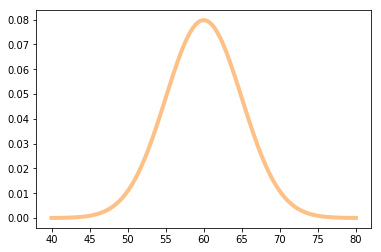

In [4]:
std_num = 4 # determine how width the distribution will be
mean, std = rv.mean(), rv.std()

xs = np.linspace(mean - std_num*std, mean + std_num*std, 100)
ys = rv.pdf(xs)
    
plt.plot(xs, ys, linewidth=4, color='#fdc086')

### Simulate
Now we have our data ready, its time to construct a function that simulates the stopping rule:<br>
We let the **m%** and **sample** to be the input of the function, and the function will return the result that it gets from the stopping rule.

In [5]:
def m_rule(sample:list, m:int, scale:int=100):
    """Simulate the m_rule on the input sample, and return the result."""
    
    actual_thresh = int(round(len(sample)*m/scale, 1))

    if actual_thresh == 0:
        return(sample[0])

    # find the best value within threshhold
    best_in_thresh = sample[0]
    for value in sample[:actual_thresh]:
        best_in_thresh = value if value > best_in_thresh else best_in_thresh

    # find the result
    for value in sample[actual_thresh:]:
        if value > best_in_thresh:
            return(value)

    # if the best value is in the threshhold unfortunately, return the last value in sample.
    return(sample[-1])
    

<br>
Let's try it with with a single sample with 100 data in it.

In [6]:
sample = rv.rvs(100)
print(sample)

[63.2622241  59.40539449 51.29566959 61.44503976 59.24006716 56.31202267
 55.55458194 69.9335808  59.3150249  58.29882243 58.3183725  54.48848824
 57.85178463 63.73563748 62.85921208 59.82582389 57.59465168 56.23732881
 44.68947481 67.95862638 61.81686082 55.74991339 62.56348758 50.71527359
 56.44606907 56.06230434 57.32477795 65.795811   61.03388786 58.45119569
 63.75228525 48.89990946 54.98694959 59.59863758 58.51247198 70.47784268
 59.77015405 55.70343044 54.62903736 69.21663621 57.01639353 64.30165944
 63.00401817 58.67203122 62.77206805 61.99663286 59.95650728 55.53038979
 55.82674872 58.98117151 59.83137519 65.14618095 58.74663718 67.23158126
 57.07405724 59.63450494 52.86896047 63.05139856 52.8105493  49.39696857
 56.65648828 58.51876027 57.02296416 57.65127642 57.37494337 68.99174455
 53.01696213 54.11968969 52.85208515 52.03900589 55.66448977 65.56704885
 60.95469111 60.1043172  54.75408078 66.26382751 52.87492894 50.22916592
 53.80189555 62.51179757 59.29940798 62.69978881 56

In [7]:
m = 5
result = m_rule(sample, m)
print(result)

69.93358080152983


In [8]:
m = 30
result = m_rule(sample, m)
print(result)

70.47784268073882


In [9]:
m = 50
result = m_rule(sample, m)
print(result)

71.6834312147234


In [10]:
m = 80
result = m_rule(sample, m)
print(result)

71.6834312147234


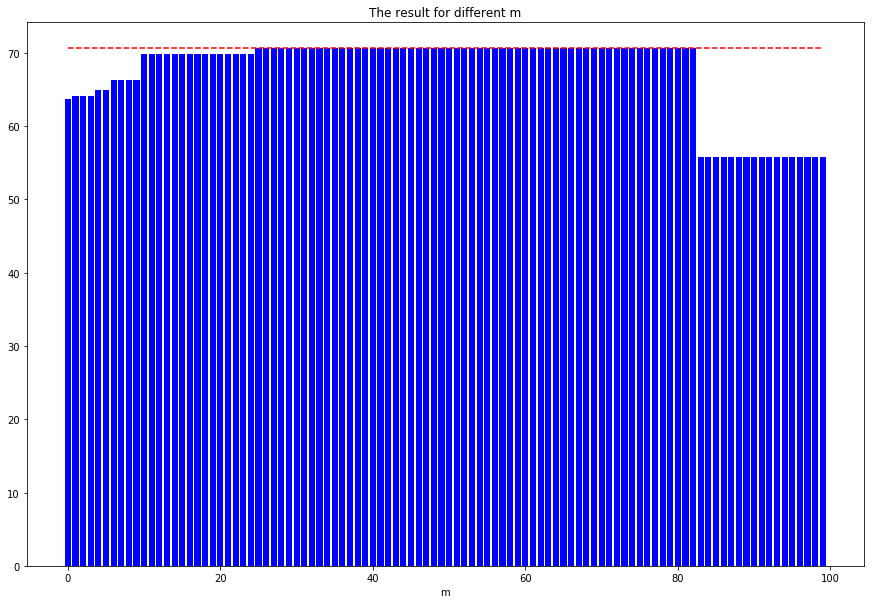

In [11]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

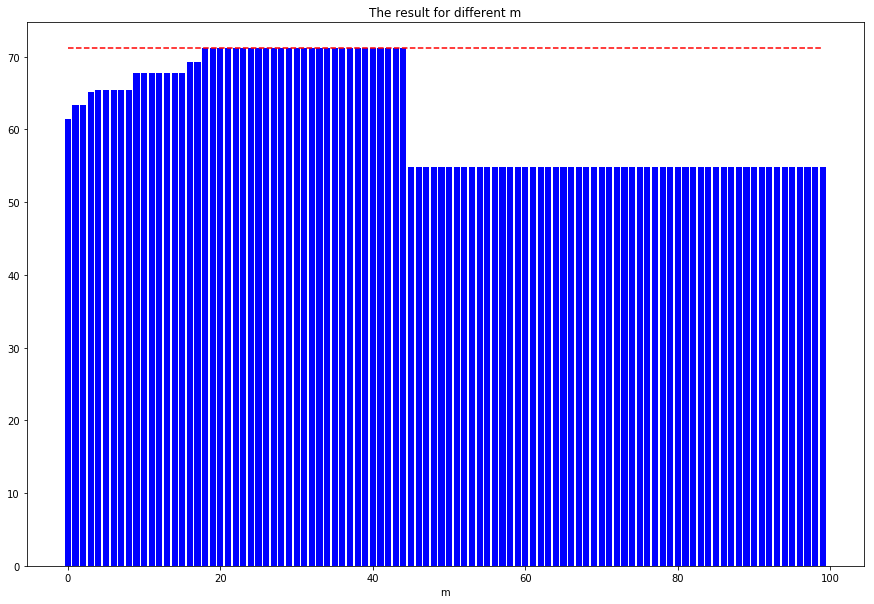

In [12]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

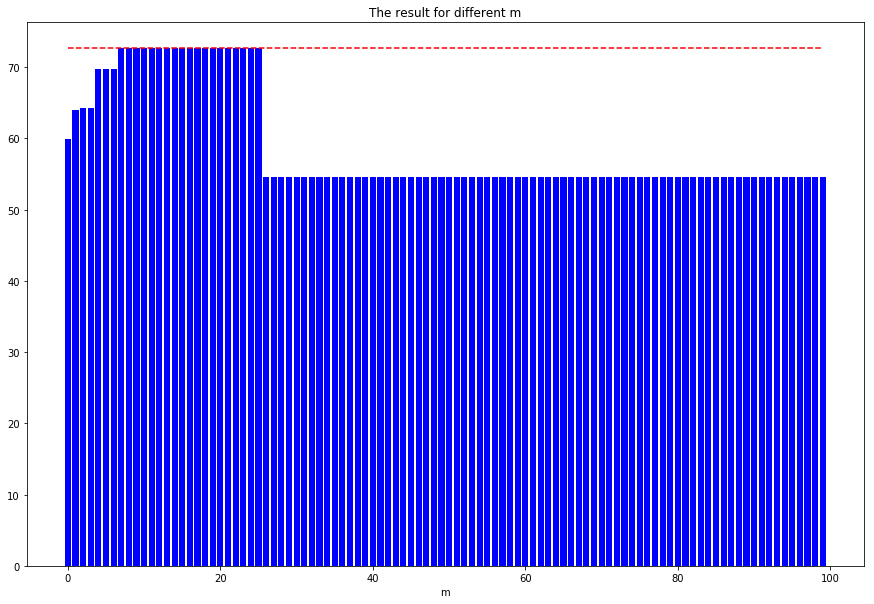

In [13]:
sample = rv.rvs(100)

results = []
for m in range(100):
    m_result = m_rule(sample, m)
    results.append(m_result)

fig, ax = plt.subplots(figsize=(15, 10))
xs = np.linspace(0, 99, 100)

#plot the best value in sample as a line
line_value = [max(sample) for i in range(len(xs))]
ax.plot(xs, line_value, 'r--')

#plot the results as bar charts
ax.bar(xs, results, color="blue")
  
ax.set_title('The result for different m')
ax.set_xlabel('m')

plt.show()

From the above plot, it seems that it is hard to tell which m is the best value for the stopping rule,<br>because the results varies a lot from each simulation.<br><br>
Therefore, let's **do the simulation multiple times and see which m has the best chance to get the greatest value**.

### Multiple Simulation
We save all the results for different m in each simulation in a big 2D numpy array **result**,<br>
and the best value in each simulation in a numpy array **best_values**

In [14]:
simulate_freq = 10
sample_size = 100
m_scale = 100

result = np.empty(shape=[m_scale, simulate_freq]) # a big 2D array that records the results for each simulation
best_values = np.empty([simulate_freq]) # a 1D array that records the best value for each simulation's sample

for sim_count in range(simulate_freq):
    sample = rv.rvs(sample_size)
    x = max(sample) # x is the best value in that sample
    best_values[sim_count] = x

    for m in range(m_scale):
        result[m, sim_count] = m_rule(sample, m, scale=m_scale)



See what the **result** 2D array looks like

In [15]:
col_name = ["sim{}".format(i+1) for i in range(simulate_freq)]
pd.DataFrame(result, columns=col_name)

,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,sim10
0,63.362803,61.606287,49.377717,54.046781,66.165780,61.707521,47.472613,58.416078,67.041125,61.955126
1,64.371908,66.396834,64.576477,54.288974,67.955652,66.407291,63.546468,63.874928,67.936385,64.073695
2,64.371908,68.099770,65.901458,66.130650,67.955652,66.407291,69.030812,64.199021,67.936385,64.073695
3,64.371908,68.099770,65.901458,66.443691,67.955652,70.206164,70.593467,64.199021,67.936385,64.073695
4,64.371908,69.272337,65.901458,66.443691,67.955652,70.206164,70.593467,64.199021,67.936385,68.044852
5,64.371908,69.272337,65.901458,66.443691,67.955652,70.206164,70.593467,64.199021,67.936385,68.044852
6,65.758530,69.272337,65.901458,67.302401,67.955652,72.652843,70.593467,64.199021,67.936385,68.044852
7,65.758530,69.272337,65.901458,67.302401,67.955652,72.652843,71.611288,64.199021,67.936385,68.044852
8,65.758530,69.272337,66.768240,67.302401,67.955652,72.652843,71.611288,64.199021,67.936385,71.419120
9,65.758530,69.272337,66.768240,67.302401,67.955652,75.705413,71.611288,64.199021,67.936385,71.419120


<br>
We then use the 2 numpy array to draw the results in the bar plot<br>
To know which m has the highest performance, we highlight the one which has the highest probability to get the best value.

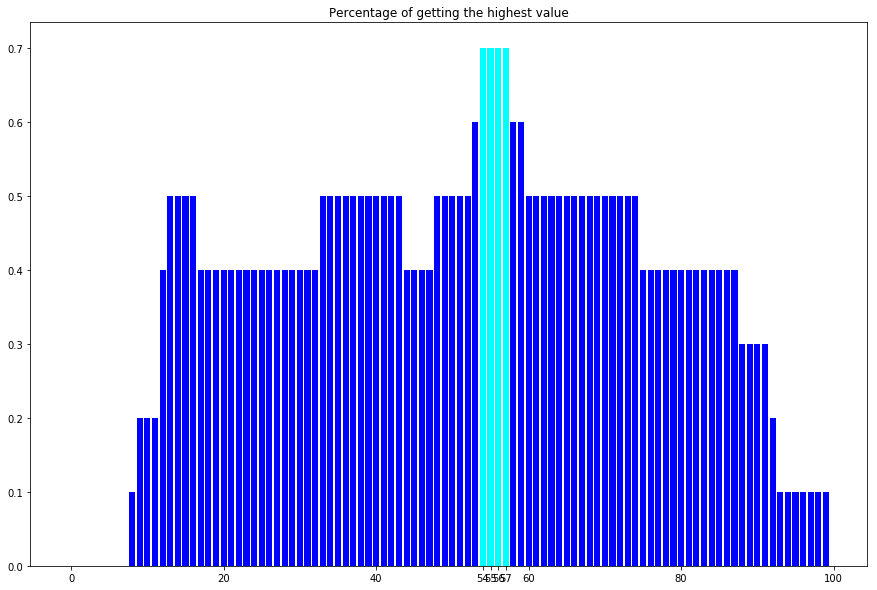

In [16]:
def count＿prob(m_array):
    return(np.sum(m_array == best_values)/simulate_freq)

xs_prob = np.apply_along_axis(count_prob, axis=1, arr=result)
best_m = np.argwhere(xs_prob == np.amax(xs_prob)).flatten()

fig, ax1 = plt.subplots(figsize=(15,10))
xs = np.linspace(0, m_scale-1, m_scale)

bars_color = np.full(m_scale, "blue")
bars_color[best_m] = "cyan" # the best performance m will have different color
xs_ticks = np.linspace(0, m_scale, 6)
xs_ticks = np.insert(xs_ticks, 0, best_m)
xs_ticks = np.sort(xs_ticks)

ax1.bar(xs, xs_prob, color=bars_color)
ax1.set_xticks(xs_ticks)
ax1.set_title('Percentage of getting the highest value')

plt.show()

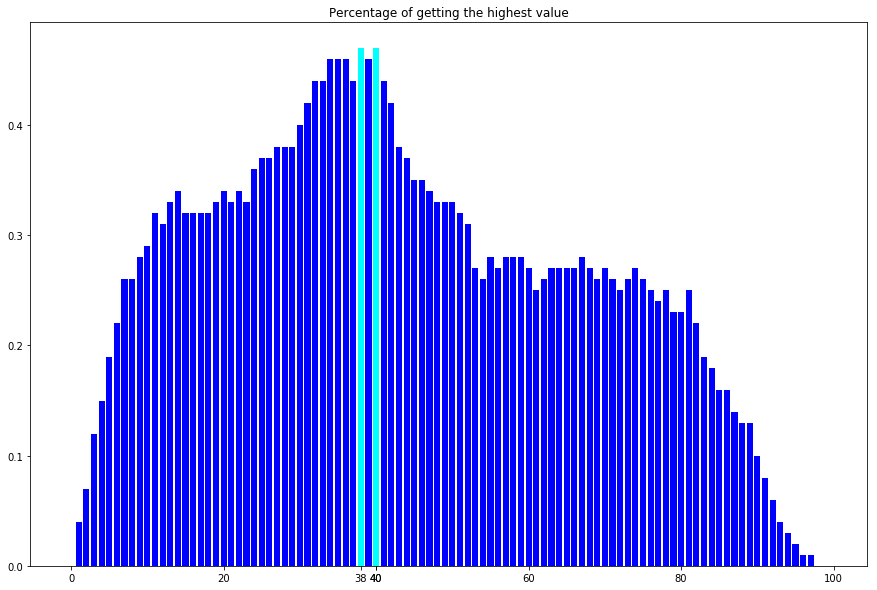

In [19]:
from Simulate import simulator
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=100, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

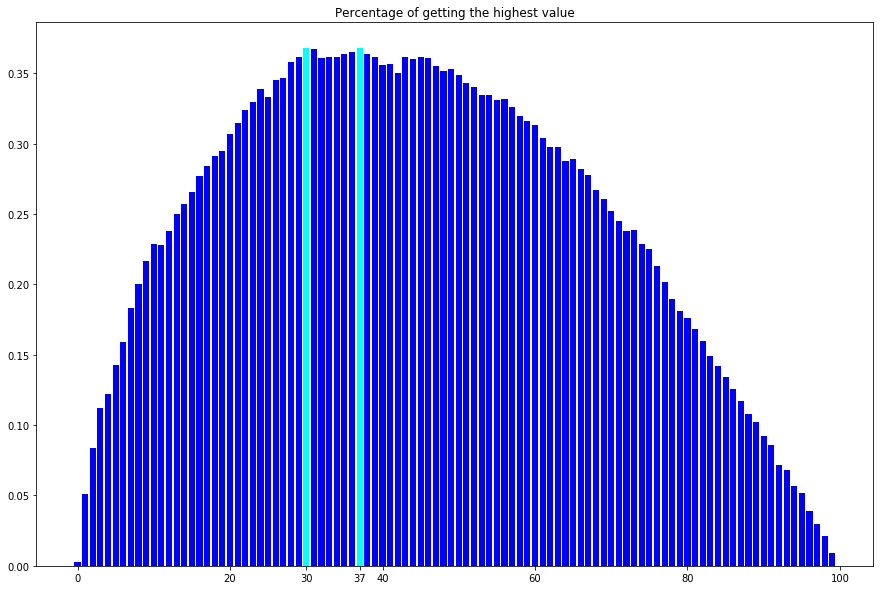

In [20]:
norm_sim = simulator(rv=rv, sample_size=1000, simulate_freq=1000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

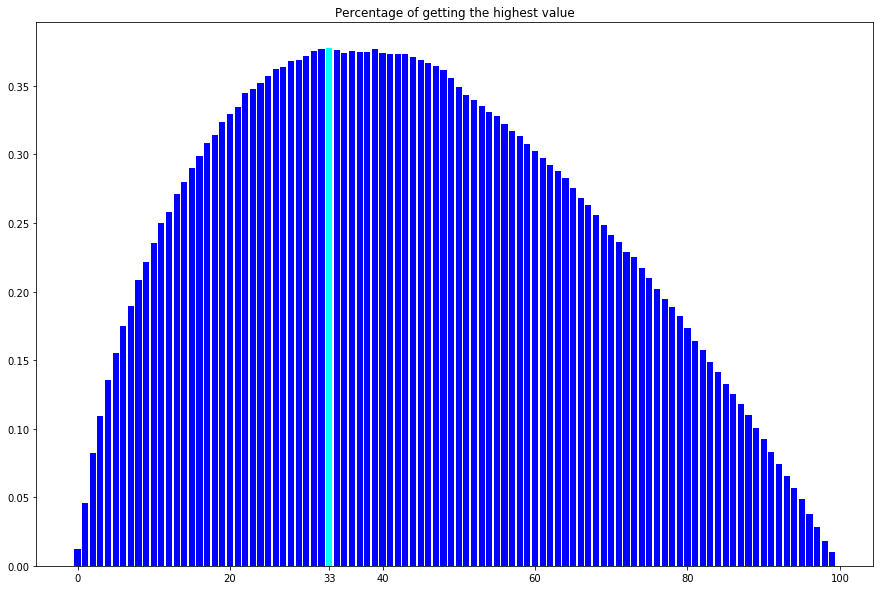

In [21]:
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=10000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

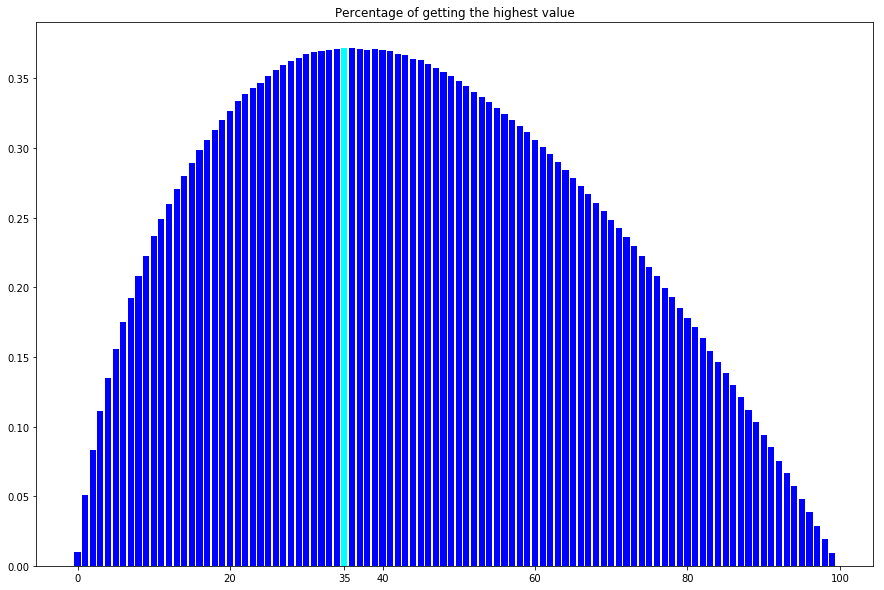

In [22]:
norm_sim = simulator(rv=rv, sample_size=100, simulate_freq=100000, m_scale=100, sample_label='norm sample')
norm_sim.run(rv_plot=False, result_plot=False)

We can see that when the simulation frequency grows, the result bar plot will have much clearer curve, and it is obvious that the better probability performance occur around 37.